# Crimes In India Analysis and Pattern Prediction

# Preprocessing

In [1]:
from pandas import read_csv
import pandas as pd
path=r"C:\Users\aditi\Downloads\crime_dataset_india.csv"

data=read_csv(path)

In [2]:
data

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,01-08-2024 16:00,07-31-2024 03:00,31-07-2024 05:05,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaN
40156,40157,31-07-2024 14:00,07-31-2024 04:00,31-07-2024 04:14,Mumbai,300,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,29-09-2024 14:00
40157,40158,02-08-2024 03:00,07-31-2024 05:00,31-07-2024 21:33,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaN
40158,40159,01-08-2024 19:00,07-31-2024 06:00,31-07-2024 11:05,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaN


In [3]:
data.shape

(40160, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


In [5]:
data.duplicated().sum()


0

In [6]:
data.isnull().sum()

Report Number             0
Date Reported             0
Date of Occurrence        0
Time of Occurrence        0
City                      0
Crime Code                0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used            5790
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed      20098
dtype: int64

In [7]:
import numpy as np
data.replace(r'^\s*$', np.nan, regex=True)

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,01-08-2024 16:00,07-31-2024 03:00,31-07-2024 05:05,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaN
40156,40157,31-07-2024 14:00,07-31-2024 04:00,31-07-2024 04:14,Mumbai,300,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,29-09-2024 14:00
40157,40158,02-08-2024 03:00,07-31-2024 05:00,31-07-2024 21:33,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaN
40158,40159,01-08-2024 19:00,07-31-2024 06:00,31-07-2024 11:05,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaN


In [8]:
data['Date Reported'] = pd.to_datetime(data['Date Reported'], dayfirst=True)
# Extract the date part
data['Date_Reported'] = data['Date Reported'].dt.date

data['Date of Occurrence'] = pd.to_datetime(data['Date of Occurrence'],format='%m-%d-%Y %H:%M' )
# Extract the date part
data['Date_of_Occurrence'] = data['Date of Occurrence'].dt.date


In [9]:
data

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Date_Reported,Date_of_Occurrence
0,1,2020-01-02 00:00:00,2020-01-01 00:00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN,2020-01-02,2020-01-01
1,2,2020-01-01 19:00:00,2020-01-01 01:00:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN,2020-01-01,2020-01-01
2,3,2020-01-02 05:00:00,2020-01-01 02:00:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN,2020-01-02,2020-01-01
3,4,2020-01-01 05:00:00,2020-01-01 03:00:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00,2020-01-01,2020-01-01
4,5,2020-01-01 21:00:00,2020-01-01 04:00:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00,2020-01-01,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,2024-08-01 16:00:00,2024-07-31 03:00:00,31-07-2024 05:05,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaN,2024-08-01,2024-07-31
40156,40157,2024-07-31 14:00:00,2024-07-31 04:00:00,31-07-2024 04:14,Mumbai,300,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,29-09-2024 14:00,2024-07-31,2024-07-31
40157,40158,2024-08-02 03:00:00,2024-07-31 05:00:00,31-07-2024 21:33,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaN,2024-08-02,2024-07-31
40158,40159,2024-08-01 19:00:00,2024-07-31 06:00:00,31-07-2024 11:05,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaN,2024-08-01,2024-07-31


In [10]:
data.pop('Date Reported')
data.pop('Date of Occurrence')
data.pop('Time of Occurrence')
data.pop('Weapon Used')
data.pop('Police Deployed')
data.pop('Crime Code')
data.pop('Report Number')


0            1
1            2
2            3
3            4
4            5
         ...  
40155    40156
40156    40157
40157    40158
40158    40159
40159    40160
Name: Report Number, Length: 40160, dtype: int64

In [11]:
data

,City,Crime Description,Victim Age,Victim Gender,Crime Domain,Case Closed,Date Case Closed,Date_Reported,Date_of_Occurrence
0,Ahmedabad,IDENTITY THEFT,16,M,Violent Crime,No,NaN,2020-01-02,2020-01-01
1,Chennai,HOMICIDE,37,M,Other Crime,No,NaN,2020-01-01,2020-01-01
2,Ludhiana,KIDNAPPING,48,F,Other Crime,No,NaN,2020-01-02,2020-01-01
3,Pune,BURGLARY,49,F,Other Crime,Yes,29-04-2020 05:00,2020-01-01,2020-01-01
4,Pune,VANDALISM,30,F,Other Crime,Yes,08-01-2020 21:00,2020-01-01,2020-01-01
...,...,...,...,...,...,...,...,...,...
40155,Kolkata,COUNTERFEITING,78,F,Other Crime,No,NaN,2024-08-01,2024-07-31
40156,Mumbai,ILLEGAL POSSESSION,75,F,Other Crime,Yes,29-09-2024 14:00,2024-07-31,2024-07-31
40157,Kanpur,VEHICLE - STOLEN,68,M,Violent Crime,No,NaN,2024-08-02,2024-07-31
40158,Patna,SEXUAL ASSAULT,11,M,Violent Crime,No,NaN,2024-08-01,2024-07-31


# Segregation for Analysis using Tableau:

Separate dataframes for ongoing and closed cases visulaisation

Data of Case Closed

In [12]:
data_case_closed=data.dropna(subset=['Date Case Closed'])
data_case_closed

,City,Crime Description,Victim Age,Victim Gender,Crime Domain,Case Closed,Date Case Closed,Date_Reported,Date_of_Occurrence
3,Pune,BURGLARY,49,F,Other Crime,Yes,29-04-2020 05:00,2020-01-01,2020-01-01
4,Pune,VANDALISM,30,F,Other Crime,Yes,08-01-2020 21:00,2020-01-01,2020-01-01
5,Delhi,ASSAULT,16,M,Violent Crime,Yes,30-03-2020 03:00,2020-01-02,2020-01-01
6,Chennai,VEHICLE - STOLEN,64,F,Violent Crime,Yes,24-03-2020 16:00,2020-01-01,2020-01-01
10,Delhi,FRAUD,71,M,Other Crime,Yes,01-02-2020 13:00,2020-01-02,2020-01-01
...,...,...,...,...,...,...,...,...,...
40149,Mumbai,PUBLIC INTOXICATION,37,M,Other Crime,Yes,16-08-2024 19:00,2024-07-31,2024-07-30
40151,Mumbai,KIDNAPPING,42,F,Other Crime,Yes,25-10-2024 00:00,2024-08-01,2024-07-30
40153,Kolkata,PUBLIC INTOXICATION,71,F,Other Crime,Yes,22-08-2024 17:00,2024-07-31,2024-07-31
40156,Mumbai,ILLEGAL POSSESSION,75,F,Other Crime,Yes,29-09-2024 14:00,2024-07-31,2024-07-31


In [13]:
data_case_closed.pop("Case Closed")

3        Yes
4        Yes
5        Yes
6        Yes
10       Yes
        ... 
40149    Yes
40151    Yes
40153    Yes
40156    Yes
40159    Yes
Name: Case Closed, Length: 20062, dtype: object

In [14]:
data_case_closed['Date Case Closed'] = pd.to_datetime(data_case_closed['Date Case Closed'],dayfirst=True )
# Extract the date part
data_case_closed['Date_Case_Closed'] = data_case_closed['Date Case Closed'].dt.date

C:\Users\aditi\AppData\Local\Temp\ipykernel_18480\4123455394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_case_closed['Date Case Closed'] = pd.to_datetime(data_case_closed['Date Case Closed'],dayfirst=True )
C:\Users\aditi\AppData\Local\Temp\ipykernel_18480\4123455394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_case_closed['Date_Case_Closed'] = data_case_closed['Date Case Closed'].dt.date


In [15]:
data_case_closed.pop("Date Case Closed")
data_case_closed

,City,Crime Description,Victim Age,Victim Gender,Crime Domain,Date_Reported,Date_of_Occurrence,Date_Case_Closed
3,Pune,BURGLARY,49,F,Other Crime,2020-01-01,2020-01-01,2020-04-29
4,Pune,VANDALISM,30,F,Other Crime,2020-01-01,2020-01-01,2020-01-08
5,Delhi,ASSAULT,16,M,Violent Crime,2020-01-02,2020-01-01,2020-03-30
6,Chennai,VEHICLE - STOLEN,64,F,Violent Crime,2020-01-01,2020-01-01,2020-03-24
10,Delhi,FRAUD,71,M,Other Crime,2020-01-02,2020-01-01,2020-02-01
...,...,...,...,...,...,...,...,...
40149,Mumbai,PUBLIC INTOXICATION,37,M,Other Crime,2024-07-31,2024-07-30,2024-08-16
40151,Mumbai,KIDNAPPING,42,F,Other Crime,2024-08-01,2024-07-30,2024-10-25
40153,Kolkata,PUBLIC INTOXICATION,71,F,Other Crime,2024-07-31,2024-07-31,2024-08-22
40156,Mumbai,ILLEGAL POSSESSION,75,F,Other Crime,2024-07-31,2024-07-31,2024-09-29


In [16]:
data_case_closed.pop("Date_Reported")
data_case_closed.pop("Date_Case_Closed")

3        2020-04-29
4        2020-01-08
5        2020-03-30
6        2020-03-24
10       2020-02-01
            ...    
40149    2024-08-16
40151    2024-10-25
40153    2024-08-22
40156    2024-09-29
40159    2024-09-28
Name: Date_Case_Closed, Length: 20062, dtype: object

In [17]:
data_case_closed["Date_of_Occurrence"] = pd.to_datetime(data_case_closed["Date_of_Occurrence"], format="%Y-%m-%d")
data_case_closed["YEAR"]=data_case_closed["Date_of_Occurrence"].dt.year
data_case_closed.pop("Date_of_Occurrence")
data_case_closed

C:\Users\aditi\AppData\Local\Temp\ipykernel_18480\2607485792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_case_closed["Date_of_Occurrence"] = pd.to_datetime(data_case_closed["Date_of_Occurrence"], format="%Y-%m-%d")
C:\Users\aditi\AppData\Local\Temp\ipykernel_18480\2607485792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_case_closed["YEAR"]=data_case_closed["Date_of_Occurrence"].dt.year


,City,Crime Description,Victim Age,Victim Gender,Crime Domain,YEAR
3,Pune,BURGLARY,49,F,Other Crime,2020
4,Pune,VANDALISM,30,F,Other Crime,2020
5,Delhi,ASSAULT,16,M,Violent Crime,2020
6,Chennai,VEHICLE - STOLEN,64,F,Violent Crime,2020
10,Delhi,FRAUD,71,M,Other Crime,2020
...,...,...,...,...,...,...
40149,Mumbai,PUBLIC INTOXICATION,37,M,Other Crime,2024
40151,Mumbai,KIDNAPPING,42,F,Other Crime,2024
40153,Kolkata,PUBLIC INTOXICATION,71,F,Other Crime,2024
40156,Mumbai,ILLEGAL POSSESSION,75,F,Other Crime,2024


Data of Case Ongoing

In [18]:
data_case_ongoing=data[data['Date Case Closed'].isnull()]
data_case_ongoing.pop('Date Case Closed')

0        NaN
1        NaN
2        NaN
7        NaN
8        NaN
        ... 
40152    NaN
40154    NaN
40155    NaN
40157    NaN
40158    NaN
Name: Date Case Closed, Length: 20098, dtype: object

In [19]:
data_case_ongoing.pop("Case Closed")
data_case_ongoing

,City,Crime Description,Victim Age,Victim Gender,Crime Domain,Date_Reported,Date_of_Occurrence
0,Ahmedabad,IDENTITY THEFT,16,M,Violent Crime,2020-01-02,2020-01-01
1,Chennai,HOMICIDE,37,M,Other Crime,2020-01-01,2020-01-01
2,Ludhiana,KIDNAPPING,48,F,Other Crime,2020-01-02,2020-01-01
7,Chennai,COUNTERFEITING,78,X,Other Crime,2020-01-02,2020-01-01
8,Mumbai,EXTORTION,41,X,Other Crime,2020-01-04,2020-01-01
...,...,...,...,...,...,...,...
40152,Srinagar,VANDALISM,65,F,Other Crime,2024-08-02,2024-07-31
40154,Chennai,COUNTERFEITING,50,F,Other Crime,2024-08-01,2024-07-31
40155,Kolkata,COUNTERFEITING,78,F,Other Crime,2024-08-01,2024-07-31
40157,Kanpur,VEHICLE - STOLEN,68,M,Violent Crime,2024-08-02,2024-07-31


In [20]:
data_case_ongoing["Date_of_Occurrence"] = pd.to_datetime(data_case_ongoing["Date_of_Occurrence"], format="%Y-%m-%d")
data_case_ongoing["YEAR"]=data_case_ongoing["Date_of_Occurrence"].dt.year
data_case_ongoing.pop("Date_of_Occurrence")
data_case_ongoing.pop("Date_Reported")
data_case_ongoing

C:\Users\aditi\AppData\Local\Temp\ipykernel_18480\3698207655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_case_ongoing["Date_of_Occurrence"] = pd.to_datetime(data_case_ongoing["Date_of_Occurrence"], format="%Y-%m-%d")
C:\Users\aditi\AppData\Local\Temp\ipykernel_18480\3698207655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_case_ongoing["YEAR"]=data_case_ongoing["Date_of_Occurrence"].dt.year


,City,Crime Description,Victim Age,Victim Gender,Crime Domain,YEAR
0,Ahmedabad,IDENTITY THEFT,16,M,Violent Crime,2020
1,Chennai,HOMICIDE,37,M,Other Crime,2020
2,Ludhiana,KIDNAPPING,48,F,Other Crime,2020
7,Chennai,COUNTERFEITING,78,X,Other Crime,2020
8,Mumbai,EXTORTION,41,X,Other Crime,2020
...,...,...,...,...,...,...
40152,Srinagar,VANDALISM,65,F,Other Crime,2024
40154,Chennai,COUNTERFEITING,50,F,Other Crime,2024
40155,Kolkata,COUNTERFEITING,78,F,Other Crime,2024
40157,Kanpur,VEHICLE - STOLEN,68,M,Violent Crime,2024


Combined dataframe for overall analysis

In [21]:
frames = [data_case_ongoing, data_case_closed]
 
result = pd.concat(frames)
result

,City,Crime Description,Victim Age,Victim Gender,Crime Domain,YEAR
0,Ahmedabad,IDENTITY THEFT,16,M,Violent Crime,2020
1,Chennai,HOMICIDE,37,M,Other Crime,2020
2,Ludhiana,KIDNAPPING,48,F,Other Crime,2020
7,Chennai,COUNTERFEITING,78,X,Other Crime,2020
8,Mumbai,EXTORTION,41,X,Other Crime,2020
...,...,...,...,...,...,...
40149,Mumbai,PUBLIC INTOXICATION,37,M,Other Crime,2024
40151,Mumbai,KIDNAPPING,42,F,Other Crime,2024
40153,Kolkata,PUBLIC INTOXICATION,71,F,Other Crime,2024
40156,Mumbai,ILLEGAL POSSESSION,75,F,Other Crime,2024


In [22]:
# Grouping by City, YEAR, and Crime Description, and count the occurrences
group_df = result.groupby(['City', 'YEAR', 'Crime Description']).size().reset_index(name='Count')

# Pivoting the table so that each crime type becomes a column
new_df = group_df.pivot_table(index=['City', 'YEAR'], 
                                  columns='Crime Description', 
                                  values='Count', 
                                  fill_value=0).reset_index()


new_df.head()

# crime_des = data_case_closed['Crime Description'].unique().tolist()


Crime Description,City,YEAR,ARSON,ASSAULT,BURGLARY,COUNTERFEITING,CYBERCRIME,DOMESTIC VIOLENCE,DRUG OFFENSE,EXTORTION,...,IDENTITY THEFT,ILLEGAL POSSESSION,KIDNAPPING,PUBLIC INTOXICATION,ROBBERY,SEXUAL ASSAULT,SHOPLIFTING,TRAFFIC VIOLATION,VANDALISM,VEHICLE - STOLEN
0,Agra,2020,10.0,13.0,10.0,10.0,5.0,8.0,6.0,4.0,...,9.0,5.0,8.0,10.0,10.0,5.0,13.0,9.0,9.0,5.0
1,Agra,2021,6.0,7.0,5.0,8.0,2.0,12.0,8.0,12.0,...,8.0,9.0,6.0,12.0,8.0,8.0,7.0,6.0,8.0,6.0
2,Agra,2022,12.0,8.0,4.0,8.0,9.0,6.0,6.0,13.0,...,8.0,5.0,7.0,9.0,9.0,8.0,10.0,10.0,4.0,12.0
3,Agra,2023,11.0,13.0,8.0,7.0,9.0,8.0,9.0,3.0,...,6.0,5.0,10.0,7.0,8.0,7.0,3.0,5.0,7.0,10.0
4,Agra,2024,4.0,6.0,5.0,7.0,7.0,4.0,2.0,7.0,...,6.0,6.0,7.0,5.0,5.0,2.0,4.0,3.0,5.0,3.0


In [23]:
# Adding a new column that contains the sum of all crime columns per row
crime_columns = [col for col in new_df.columns if col not in ['City', 'YEAR']]
new_df['Total_crimes'] = new_df[crime_columns].sum(axis=1)
new_df.head()

Crime Description,City,YEAR,ARSON,ASSAULT,BURGLARY,COUNTERFEITING,CYBERCRIME,DOMESTIC VIOLENCE,DRUG OFFENSE,EXTORTION,...,ILLEGAL POSSESSION,KIDNAPPING,PUBLIC INTOXICATION,ROBBERY,SEXUAL ASSAULT,SHOPLIFTING,TRAFFIC VIOLATION,VANDALISM,VEHICLE - STOLEN,Total_crimes
0,Agra,2020,10.0,13.0,10.0,10.0,5.0,8.0,6.0,4.0,...,5.0,8.0,10.0,10.0,5.0,13.0,9.0,9.0,5.0,178.0
1,Agra,2021,6.0,7.0,5.0,8.0,2.0,12.0,8.0,12.0,...,9.0,6.0,12.0,8.0,8.0,7.0,6.0,8.0,6.0,155.0
2,Agra,2022,12.0,8.0,4.0,8.0,9.0,6.0,6.0,13.0,...,5.0,7.0,9.0,9.0,8.0,10.0,10.0,4.0,12.0,166.0
3,Agra,2023,11.0,13.0,8.0,7.0,9.0,8.0,9.0,3.0,...,5.0,10.0,7.0,8.0,7.0,3.0,5.0,7.0,10.0,162.0
4,Agra,2024,4.0,6.0,5.0,7.0,7.0,4.0,2.0,7.0,...,6.0,7.0,5.0,5.0,2.0,4.0,3.0,5.0,3.0,103.0


# Clustering and classification

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_df.iloc[:,0]=le.fit_transform(new_df.iloc[:,0])
new_df['City'] = new_df['City'].astype(int)
new_df

Crime Description,City,YEAR,ARSON,ASSAULT,BURGLARY,COUNTERFEITING,CYBERCRIME,DOMESTIC VIOLENCE,DRUG OFFENSE,EXTORTION,...,ILLEGAL POSSESSION,KIDNAPPING,PUBLIC INTOXICATION,ROBBERY,SEXUAL ASSAULT,SHOPLIFTING,TRAFFIC VIOLATION,VANDALISM,VEHICLE - STOLEN,Total_crimes
0,0,2020,10.0,13.0,10.0,10.0,5.0,8.0,6.0,4.0,...,5.0,8.0,10.0,10.0,5.0,13.0,9.0,9.0,5.0,178.0
1,0,2021,6.0,7.0,5.0,8.0,2.0,12.0,8.0,12.0,...,9.0,6.0,12.0,8.0,8.0,7.0,6.0,8.0,6.0,155.0
2,0,2022,12.0,8.0,4.0,8.0,9.0,6.0,6.0,13.0,...,5.0,7.0,9.0,9.0,8.0,10.0,10.0,4.0,12.0,166.0
3,0,2023,11.0,13.0,8.0,7.0,9.0,8.0,9.0,3.0,...,5.0,10.0,7.0,8.0,7.0,3.0,5.0,7.0,10.0,162.0
4,0,2024,4.0,6.0,5.0,7.0,7.0,4.0,2.0,7.0,...,6.0,7.0,5.0,5.0,2.0,4.0,3.0,5.0,3.0,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,28,2020,10.0,7.0,5.0,6.0,7.0,10.0,11.0,5.0,...,9.0,8.0,4.0,10.0,6.0,7.0,11.0,12.0,8.0,167.0
141,28,2021,10.0,13.0,9.0,2.0,10.0,6.0,5.0,4.0,...,7.0,5.0,4.0,6.0,8.0,6.0,12.0,6.0,9.0,151.0
142,28,2022,9.0,4.0,7.0,6.0,12.0,6.0,5.0,7.0,...,6.0,8.0,5.0,5.0,8.0,3.0,11.0,8.0,9.0,153.0
143,28,2023,7.0,6.0,5.0,4.0,4.0,9.0,16.0,8.0,...,6.0,6.0,6.0,3.0,5.0,3.0,4.0,13.0,7.0,147.0


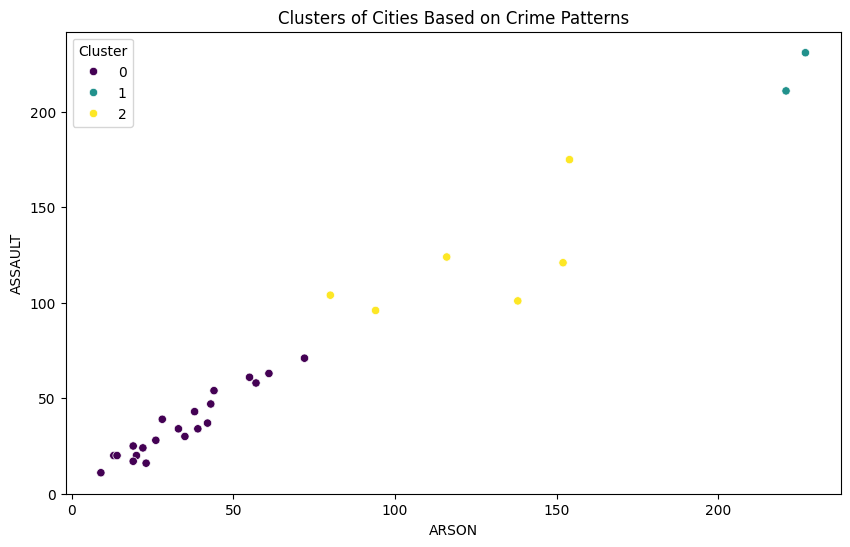


Cities in Cluster 0:
['Agra' 'Bhopal' 'Faridabad' 'Ghaziabad' 'Indore' 'Jaipur' 'Kalyan'
 'Kanpur' 'Lucknow' 'Ludhiana' 'Meerut' 'Nagpur' 'Nashik' 'Patna' 'Rajkot'
 'Srinagar' 'Surat' 'Thane' 'Varanasi' 'Vasai' 'Visakhapatnam']

Cities in Cluster 1:
['Delhi' 'Mumbai']

Cities in Cluster 2:
['Ahmedabad' 'Bangalore' 'Chennai' 'Hyderabad' 'Kolkata' 'Pune']


In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data by summing crime occurrences for each city across the years
city_crime_data = new_df.groupby('City').sum().reset_index()

# Drop 'YEAR' column, as we want to cluster based on crime numbers
city_crime_data = city_crime_data.drop(columns=['YEAR'])


# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can experiment with the number of clusters
city_crime_data['Cluster'] = kmeans.fit_predict(city_crime_data.iloc[:, 1:])  # Exclude City column for clustering

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ARSON', y='ASSAULT', hue='Cluster', data=city_crime_data, palette='viridis')
plt.title('Clusters of Cities Based on Crime Patterns')
plt.show()

# Check the cities in each cluster
for cluster in range(3):  # 3 clusters in this case
    print(f"\nCities in Cluster {cluster}:")
    print(le.inverse_transform(city_crime_data[city_crime_data['Cluster'] == cluster]['City'].values))


In [26]:
city_crime_data

Crime Description,City,ARSON,ASSAULT,BURGLARY,COUNTERFEITING,CYBERCRIME,DOMESTIC VIOLENCE,DRUG OFFENSE,EXTORTION,FIREARM OFFENSE,...,KIDNAPPING,PUBLIC INTOXICATION,ROBBERY,SEXUAL ASSAULT,SHOPLIFTING,TRAFFIC VIOLATION,VANDALISM,VEHICLE - STOLEN,Total_crimes,Cluster
0,0,43.0,47.0,32.0,40.0,32.0,38.0,31.0,39.0,40.0,...,38.0,43.0,40.0,30.0,37.0,33.0,33.0,36.0,764.0,0
1,1,80.0,104.0,94.0,84.0,87.0,102.0,82.0,83.0,88.0,...,86.0,82.0,94.0,101.0,85.0,81.0,76.0,75.0,1817.0,2
2,2,154.0,175.0,187.0,176.0,155.0,171.0,168.0,188.0,164.0,...,168.0,198.0,167.0,156.0,167.0,166.0,179.0,162.0,3588.0,2
3,3,38.0,43.0,23.0,29.0,31.0,34.0,30.0,26.0,28.0,...,42.0,41.0,28.0,28.0,35.0,31.0,33.0,29.0,690.0,0
4,4,138.0,101.0,134.0,115.0,117.0,97.0,103.0,122.0,122.0,...,135.0,107.0,108.0,126.0,116.0,110.0,124.0,131.0,2493.0,2
5,5,227.0,231.0,254.0,254.0,286.0,275.0,278.0,246.0,291.0,...,260.0,246.0,280.0,254.0,244.0,198.0,256.0,247.0,5400.0,1
6,6,19.0,25.0,11.0,14.0,13.0,20.0,12.0,13.0,17.0,...,21.0,18.0,18.0,14.0,16.0,18.0,22.0,14.0,354.0,0
7,7,35.0,30.0,37.0,32.0,27.0,40.0,40.0,32.0,24.0,...,36.0,40.0,41.0,33.0,27.0,42.0,31.0,29.0,704.0,0
8,8,152.0,121.0,140.0,136.0,139.0,143.0,134.0,124.0,138.0,...,126.0,143.0,138.0,129.0,120.0,135.0,131.0,165.0,2881.0,2
9,9,28.0,39.0,31.0,32.0,34.0,33.0,34.0,39.0,45.0,...,30.0,26.0,41.0,30.0,30.0,32.0,28.0,37.0,699.0,0


In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(city_crime_data.iloc[:,1:-1],city_crime_data.iloc[:,-1],test_size=0.2,random_state=42)


In [28]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

# Testing with different models

In [29]:
from sklearn.ensemble import RandomForestClassifier


model_RF=RandomForestClassifier(random_state=42)
model_RF.fit(x_train,y_train)

# Predict and evaluate
y_pred = model_RF.predict(x_test)
accuracy_RF =model_RF.score(x_test,y_test)
print(accuracy_RF)




1.0


In [30]:
from sklearn.tree import DecisionTreeClassifier

model_dt=DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
print(model_dt.score(x_test,y_test))

1.0


In [31]:
from sklearn.naive_bayes import GaussianNB

model_NB=GaussianNB()
model_NB.fit(x_train,y_train)

accuracy_NB=model_NB.score(x_test,y_test)
print(accuracy_NB)

1.0


In [32]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()
model_lr.fit(x_train,y_train)
print(model_lr.score(x_test,y_test))

0.5


c:\Users\aditi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Improved accuracy of Logistic Regression by scaling

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model_lr = LogisticRegression()
model_lr.fit(x_train_scaled, y_train)
print(model_lr.score(x_test_scaled, y_test))


1.0


# Cross-validation

In [49]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the Random Forest classifier
scores_rf = cross_val_score(RandomForestClassifier(random_state=42), city_crime_data.iloc[:,1:-1], city_crime_data.iloc[:,-1], cv=5)

# Print the mean cross-validated accuracy
print("Cross-validated accuracy:", scores_rf.mean())


c:\Users\aditi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-validated accuracy: 0.9333333333333333


In [50]:
# Instantiate the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Perform 5-fold cross-validation
scores_gb = cross_val_score(nb_model, city_crime_data.iloc[:,1:-1], city_crime_data.iloc[:,-1], cv=5)

# Print the mean cross-validated accuracy
print("Cross-validated accuracy (Naive Bayes):", scores_gb.mean())


Cross-validated accuracy (Naive Bayes): 0.8666666666666668


c:\Users\aditi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [52]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
lr_model = LogisticRegression(max_iter=4000)  # max_iter increased for convergence

# Perform 5-fold cross-validation
scores_lr = cross_val_score(lr_model, city_crime_data.iloc[:,1:-1], city_crime_data.iloc[:,-1], cv=5)

# Print the mean cross-validated accuracy
print("Cross-validated accuracy (Logistic Regression):", scores_lr.mean())


c:\Users\aditi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-validated accuracy (Logistic Regression): 0.9


In [53]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier(random_state=42)
scores_dt=cross_val_score(dt_model,city_crime_data.iloc[:,1:-1], city_crime_data.iloc[:,-1], cv=5)

print("Decision Tree accuracy:", scores_dt.mean())

Decision Tree accuracy: 0.9


c:\Users\aditi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


# Conclusion:  Random Forest can better generalise unseen data

# Tried Removing overfitting 

Hyperparameter Tuning based on Grid Search below

In [38]:
rf_model1 = RandomForestClassifier(max_depth=5,n_estimators=50, random_state=42, min_samples_leaf=1,max_features='sqrt',min_samples_split=2)

rf_model1.fit(x_train,y_train)

# Predict and evaluate
y_pred = rf_model1.predict(x_test)
accuracy_RF1 =rf_model1.score(x_test,y_test)
print(accuracy_RF1)





1.0


Grid Search to get parameters'values instead of manual tweaking 

In [39]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5)

# Fit the model
grid_search.fit(x_train, y_train)

# Print the best parameters and accuracy
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated accuracy: ", grid_search.best_score_)


c:\Users\aditi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found:  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validated accuracy:  0.9199999999999999


c:\Users\aditi\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [40]:
from sklearn.metrics import classification_report

In [41]:
y_pred = grid_search.best_estimator_.predict(x_test)
accur_RF1 =grid_search.best_estimator_.score(x_test,y_test)
print(accur_RF1)
print(classification_report(y_test, y_pred))


1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



Confusion matrix

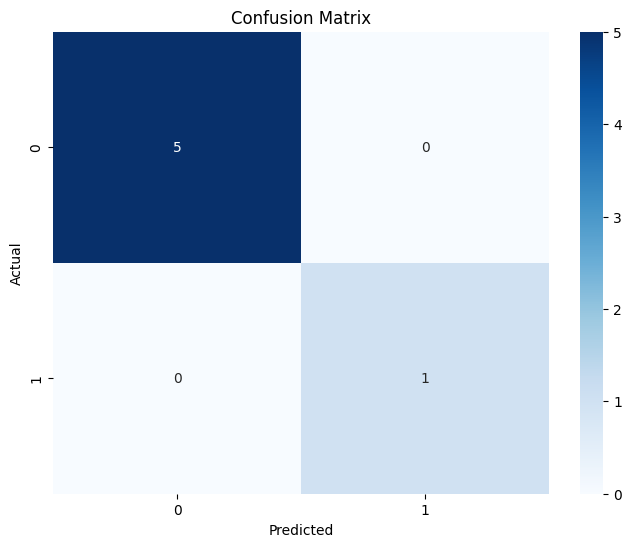

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# Results

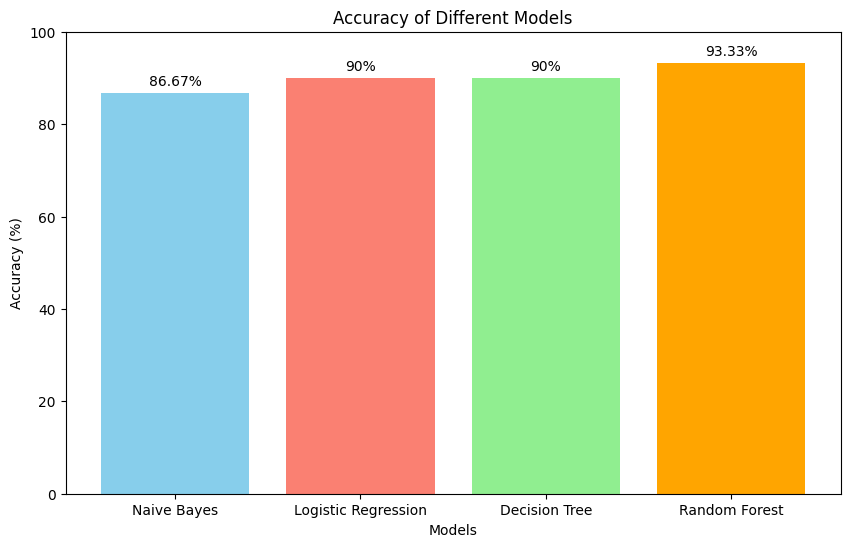

In [60]:
import matplotlib.pyplot as plt

models=["Naive Bayes","Logistic Regression","Decision Tree","Random Forest"]
accuracies=[86.67,90,90,93.33]

colors = ['skyblue', 'salmon', 'lightgreen', 'orange'] 
plt.figure(figsize=(10, 6))
bars=plt.bar(models, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Models')
plt.ylim(0, 100) 

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{accuracy}%', 
             ha='center', va='bottom')
plt.show()




In [65]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold


# Define the model
mod = RandomForestClassifier(random_state=42)

# Set up cross-validation strategy
cv = StratifiedKFold(n_splits=5)  # 5-fold stratified cross-validation

# Get cross-validation predictions
y_prediction = cross_val_predict(mod, city_crime_data.iloc[:,1:-1], city_crime_data.iloc[:,-1], cv=cv)

# Generate and display the classification report
rep = classification_report(city_crime_data.iloc[:,-1],y_prediction)
print(rep)

# Alternatively, to get the cross-validation accuracy scores
accu = cross_val_score(mod,city_crime_data.iloc[:,1:-1], city_crime_data.iloc[:,-1], cv=cv, scoring='accuracy')
print("Cross-validation accuracies:", accu)
print("Mean accuracy:", accu.mean())


c:\Users\aditi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.50      0.67         2
           2       0.83      0.83      0.83         6

    accuracy                           0.93        29
   macro avg       0.93      0.78      0.83        29
weighted avg       0.93      0.93      0.93        29



c:\Users\aditi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation accuracies: [0.83333333 1.         1.         0.83333333 1.        ]
Mean accuracy: 0.9333333333333333


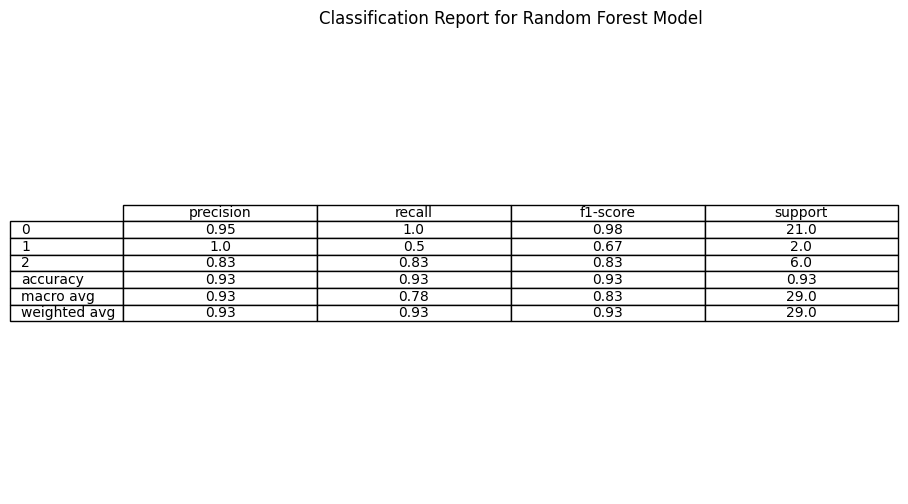

In [68]:
rep = classification_report(city_crime_data.iloc[:,-1],y_prediction,output_dict=True)
report_df = pd.DataFrame(rep).transpose().round(2)  # Convert to DataFrame for easier plotting

# Plot and save the classification report as an image
plt.figure(figsize=(10, 6))
plt.axis('off')  # Hide axes
plt.table(cellText=report_df.values, colLabels=report_df.columns, rowLabels=report_df.index,
          cellLoc='center', loc='center')
plt.title('Classification Report for Random Forest Model')
plt.savefig("classification_report.png", bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show()

# Final Conclusion after applying Overfitting techniques on RF : Since test dataset is small and labels are provided by clustering algorithms, the model is perfectly able to predict the pattern of crime followed by a certain city which is similar to group of cities the model is trained on. Thus, it would help to mitigate the crime cases by applying similar solution to reduce crimes in group of cities following same pattern

# Applying regularisation to Logistic regression for testing , but yielded bad accuracy in comparison to RF

In [43]:

model = LogisticRegression(penalty='l2', C=0.01)  # Ridge regularization with smaller C for stronger regularization 
model.fit(x_train,y_train)
print(model.score(x_test,y_test))


0.6666666666666666


c:\Users\aditi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Analaysing balanced class distribution and features' contribution to prediction

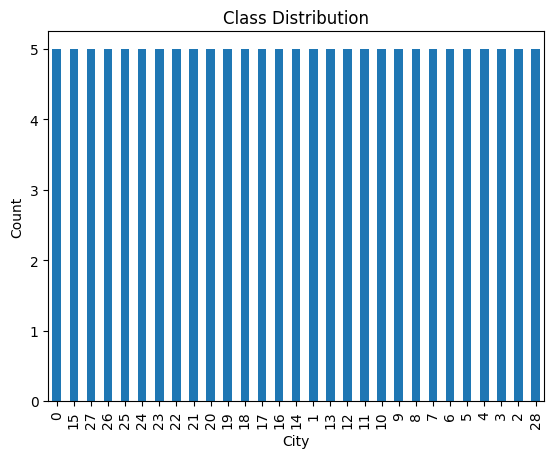

In [44]:
import matplotlib.pyplot as plt

# Visualize the class distribution
new_df['City'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()


                Feature  Importance
8       FIREARM OFFENSE    0.074026
1               ASSAULT    0.067122
7             EXTORTION    0.062820
9                 FRAUD    0.060616
11       IDENTITY THEFT    0.059332
2              BURGLARY    0.058570
14  PUBLIC INTOXICATION    0.057282
5     DOMESTIC VIOLENCE    0.056699
21         Total_crimes    0.052737
4            CYBERCRIME    0.050167
13           KIDNAPPING    0.047540
0                 ARSON    0.046331
17          SHOPLIFTING    0.041697
19            VANDALISM    0.041421
12   ILLEGAL POSSESSION    0.039696
20     VEHICLE - STOLEN    0.035214
10             HOMICIDE    0.033113
6          DRUG OFFENSE    0.032843
15              ROBBERY    0.031037
3        COUNTERFEITING    0.023722
18    TRAFFIC VIOLATION    0.022847
16       SEXUAL ASSAULT    0.005169


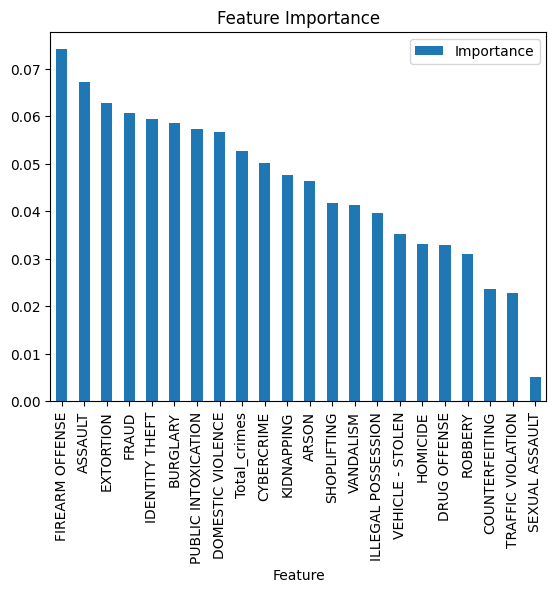

In [45]:


# Get feature importances
importances = model_RF.feature_importances_
feature_names = x_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort and display
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Plot feature importance
feature_importance_df.plot(kind='bar', x='Feature', y='Importance', title='Feature Importance')
plt.show()
